In [1]:
! pip install requests


                                              0.0/62.6 kB ? eta -:--:--
     ---------------------------------------  61.4/62.6 kB 1.1 MB/s eta 0:00:01
     ---------------------------------------- 62.6/62.6 kB 1.1 MB/s eta 0:00:00
                                              0.0/96.6 kB ? eta -:--:--
                                              0.0/96.6 kB ? eta -:--:--
     -------------------------                61.4/96.6 kB 3.2 MB/s eta 0:00:01
     --------------------------------------   92.2/96.6 kB 1.3 MB/s eta 0:00:01
     ---------------------------------------- 96.6/96.6 kB 1.4 MB/s eta 0:00:00
                                              0.0/123.9 kB ? eta -:--:--
     ---------                               30.7/123.9 kB 1.4 MB/s eta 0:00:01
     -------------------                     61.4/123.9 kB 1.1 MB/s eta 0:00:01
     ---------------------                 71.7/123.9 kB 653.6 kB/s eta 0:00:01
     ------------------------------------ 123.9/123.9 kB 811.9 kB/s eta


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\Acer\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [3]:
import sys
assert sys.version_info >= (3, 7)

import numpy as np
import cv2 as cv
from util_func import *

### Question 1

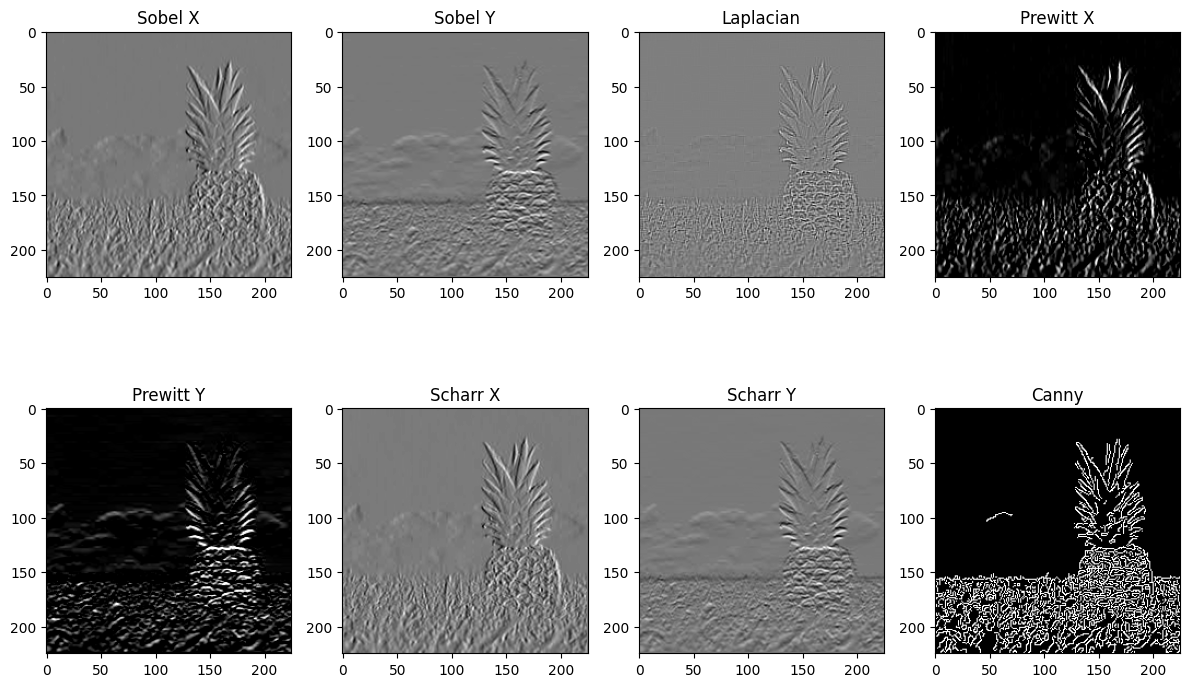

In [4]:
img = cv.imread("images/pineapple.jfif")
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Apply different edge detectors
sobel_x = cv.Sobel(gray, cv.CV_32F, 1, 0, ksize=3)
sobel_y = cv.Sobel(gray, cv.CV_32F, 0, 1, ksize=3)
laplacian = cv.Laplacian(gray, cv.CV_16S, ksize=3)
prewitt_x = cv.filter2D(gray, -1, np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]))
prewitt_y = cv.filter2D(gray, -1, np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]))
scharr_x = cv.Scharr(gray, cv.CV_32F, 1, 0)
scharr_y = cv.Scharr(gray, cv.CV_32F, 0, 1)
canny = cv.Canny(gray, 100, 200)

# Plot the results
plt.figure(figsize=(12, 8))

plt.subplot(2, 4, 1)
plt.imshow(sobel_x, cmap='gray')
plt.title('Sobel X')

plt.subplot(2, 4, 2)
plt.imshow(sobel_y, cmap='gray')
plt.title('Sobel Y')

plt.subplot(2, 4, 3)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian')

plt.subplot(2, 4, 4)
plt.imshow(prewitt_x, cmap='gray')
plt.title('Prewitt X')

plt.subplot(2, 4, 5)
plt.imshow(prewitt_y, cmap='gray')
plt.title('Prewitt Y')

plt.subplot(2, 4, 6)
plt.imshow(scharr_x, cmap='gray')
plt.title('Scharr X')

plt.subplot(2, 4, 7)
plt.imshow(scharr_y, cmap='gray')
plt.title('Scharr Y')

plt.subplot(2, 4, 8)
plt.imshow(canny, cmap='gray')
plt.title('Canny')

plt.tight_layout()
plt.show()

### Question 2

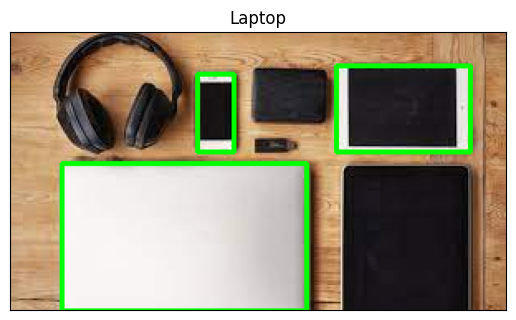

In [12]:
img = cv.imread('images/electronic.jfif')

hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

lower_white = np.array([0, 0, 160])
upper_white = np.array([140, 30, 255])

mask = cv.inRange(hsv, lower_white, upper_white)

contours, _ = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

bbs = []

for c in contours:
        bb = cv.boundingRect(c)
        bbs.append(bb)
        
for bb in bbs:
    x, y, w, h = bb
    cv.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt_img(img, "Laptop")
plt.show()

### Question 3

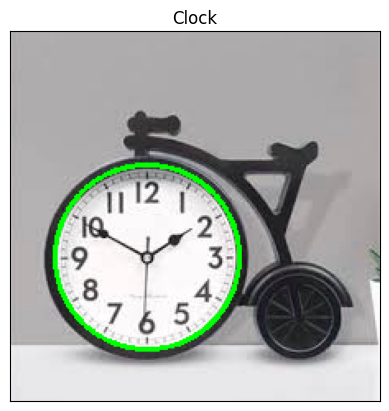

In [20]:
img = cv.imread('images/clock.jpg')

img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

edges = cv.Canny(img_gray, threshold1=50, threshold2=150)

contours, _ = cv.findContours(edges.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

min_area = 1000  
filtered_contours = [contour for contour in contours if cv.contourArea(contour) > min_area]

largest_contour = max(filtered_contours, key=cv.contourArea)

((x, y), radius) = cv.minEnclosingCircle(largest_contour)
center = (int(x), int(y))
radius = int(radius)

cv.circle(img, center, radius, (0, 255, 0), 2)

plt_img(img, "Clock")
plt.show()